In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib notebook
import matplotlib.pyplot as plt

def get_random_ops(rows=100): # Función para hacer operaciones matemáticas simples
    data = []
    for i in range(0, rows):
        a = random.randint(1,100)
        b = random.randint(1,100)
        
        suma,resta,mul,div = random.choice([
         [1,0,0,0],
         [0,1,0,0],
         [0,0,1,0],
         [0,0,0,1],
        ])
        
        if suma == 1: y = a+b
        if resta == 1:y = a-b
        if mul == 1:y = a*b
        if div == 1:y = a/b
        data.append({
            "a":a,
            "b":b,
            "suma":suma,
            "resta":resta,
            "mul":mul,
            "div":div,
            "y":round(y,2)
        })
    return data

In [2]:
data = pd.DataFrame(get_random_ops(500000))
data[["a","b","suma","resta","mul","div","y"]].head()

,a,b,suma,resta,mul,div,y
0,1,42,0,0,0,1,0.02
1,12,16,0,0,0,1,0.75
2,53,85,0,0,0,1,0.62
3,99,95,0,0,0,1,1.04
4,74,31,0,0,0,1,2.39


<IPython.core.display.Javascript object>


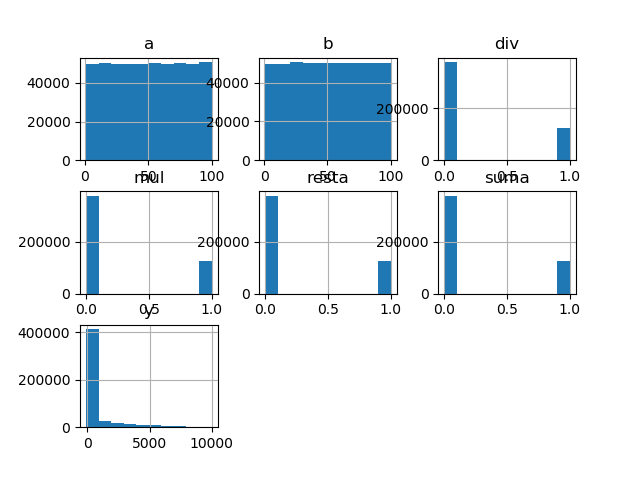

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002393BFB9D88>,
      dtype=object)

In [3]:
data.hist()

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(
data[["a","b","suma","resta","mul","div"]], data["y"],
test_size = 0.30, random_state = 42)

In [6]:
model = MLPRegressor(
    max_iter = 800, # El número de iteraciones 
    hidden_layer_sizes = (100,100,100), # Capas cada una de 100
    learning_rate_init = 0.0001 #Presición 
)
model.fit(x_train, y_train) # Entrenando a la neurona con la activacion relu

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.0001, max_fun=15000, max_iter=800,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
print(x_test.iloc[2000])
print(y_test.iloc[2000])
print(model.predict(x_test.iloc[[2000]]))

a        13
b        34
suma      0
resta     0
mul       1
div       0
Name: 20955, dtype: int64
442.0
[438.19186946]


In [10]:
predict = model.predict(x_test)
print("Predict: %s" %list(predict[:5]))

Predict: [-0.2909807124522849, -3.6693446452005283, -3.1081020363173657, 118.09898877417235, 74.50174096389885]


In [11]:
data_check = pd.DataFrame(predict, columns=["predict"])
data_check["y"]=list(y_test)
data_check.set_index(["y"], drop= False, inplace= True)

<IPython.core.display.Javascript object>


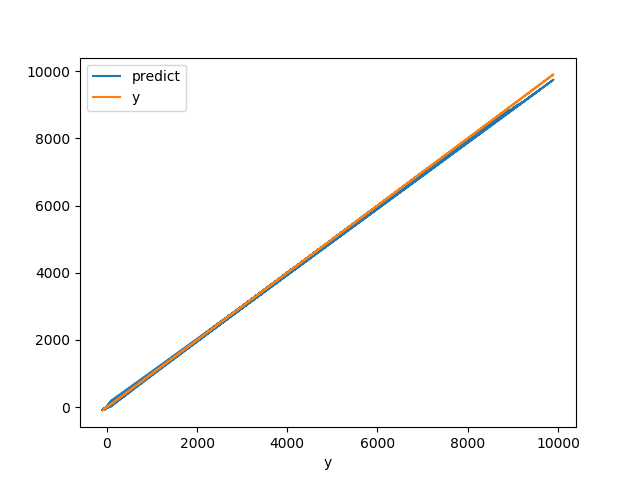

In [18]:
data_check.plot() #Intento 2 de entrenamiento resultados

<IPython.core.display.Javascript object>


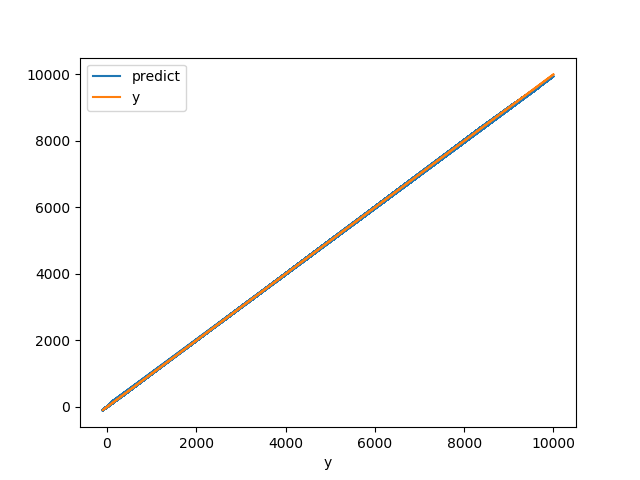

In [12]:
data_check.plot() # Intento 3 de entrenamiento resultados